In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn import preprocessing



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("CoffeeRatings.csv", delimiter= ";")

df

,Scores_Aroma,Scores_Flavor,Scores_Aftertaste,Scores_Acidity,Scores_Body,Scores_Balance,Scores_Uniformity,Scores_Sweetness,Scores_Moisture,Scores_Total,Color
0,85,85,80,80,80,80,100,100,12,8692,Green
1,85,817,80,775,80,80,100,100,12,8642,Green
2,833,80,80,80,775,80,100,100,11,8608,Blue-Green
3,80,80,80,767,775,80,100,100,11,8542,Blue-Green
4,80,792,775,775,80,775,100,100,11,8492,Green
...,...,...,...,...,...,...,...,...,...,...,...
830,758,70,675,692,70,692,100,100,11,7917,Green
831,758,767,742,742,767,767,867,867,1,7908,Green
832,0,0,0,0,0,0,0,0,12,0,Green
833,767,775,783,767,792,783,100,792,1,825,Bluish-Green


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Scores_Aroma       835 non-null    int64 
 1   Scores_Flavor      835 non-null    int64 
 2   Scores_Aftertaste  835 non-null    int64 
 3   Scores_Acidity     835 non-null    int64 
 4   Scores_Body        835 non-null    int64 
 5   Scores_Balance     835 non-null    int64 
 6   Scores_Uniformity  835 non-null    int64 
 7   Scores_Sweetness   835 non-null    int64 
 8   Scores_Moisture    835 non-null    int64 
 9   Scores_Total       835 non-null    int64 
 10  Color              835 non-null    object
dtypes: int64(10), object(1)
memory usage: 71.9+ KB


In [5]:
df["Color"].unique()

array(['Green', 'Blue-Green', 'Bluish-Green'], dtype=object)

In [6]:
colors = {
    'Green': 'forestgreen',
    'Blue-Green': 'aqua',
    'Bluish-Green': 'teal',
}

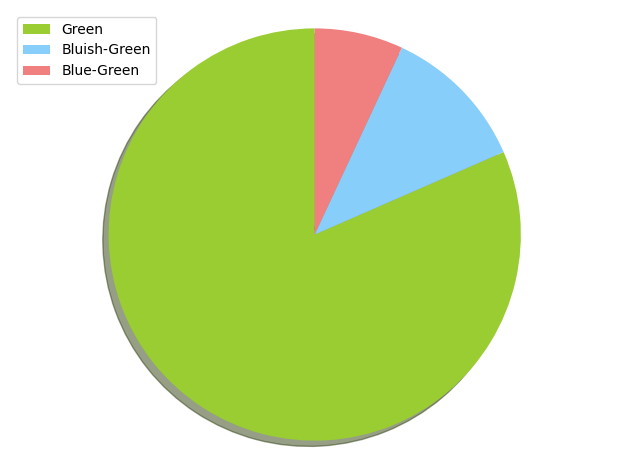

In [7]:
# plt.figure(figsize=(12, 8))
# sns.countplot(x='Color', data=df, palette=colors, order=df['Color'].value_counts().index)
# # plt.xticks(rotation=-45)
# plt.show()


# Ploteo distribución de "Output"
temp = df["Color"].value_counts()
df_aux = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })

labels = df_aux['labels']
sizes = df_aux['values']
colors = ['yellowgreen', 'lightskyblue', 'lightcoral']#,'cyan','lightpink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90, pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

In [8]:
def global_boxplots(df):
    # Asegúrate de que todas las columnas sean numéricas
    columnas_numericas = df.drop('Color',axis=1).select_dtypes(include=['number'])
    
    if columnas_numericas.empty:
        print("No hay columnas numéricas en el DataFrame.")
        return
    
    # Normalizar las columnas numéricas
    scaler = StandardScaler()
    columnas_numericas_normalized = pd.DataFrame(scaler.fit_transform(columnas_numericas), columns=columnas_numericas.columns)
    
    # Crear una lista de títulos de columnas rotados
    column_titles = [col for col in columnas_numericas_normalized.columns]
    # column_titles = [col for col in columnas_numericas.columns]

    # Graficar los boxplots de las columnas numéricas normalizadas con rango en el eje Y de -4 a 4
    plt.figure(figsize=(20, 10))
    plt.title("Boxplots para todas las variables")
    boxplot = plt.boxplot(columnas_numericas_normalized.values, vert=True)
    # boxplot = plt.boxplot(columnas_numericas.values, vert=True)

    # Rotar los títulos de las columnas
    plt.xticks(range(1, len(columnas_numericas_normalized.columns) + 1), column_titles, rotation=90)
    # plt.xticks(range(1, len(columnas_numericas.columns) + 1), column_titles, rotation=90)

    plt.xlabel("Variables")
    plt.ylabel("Valores Normalizados")
    # plt.ylim(-4, 4)  # Establecer el rango en el eje Y
    plt.show()

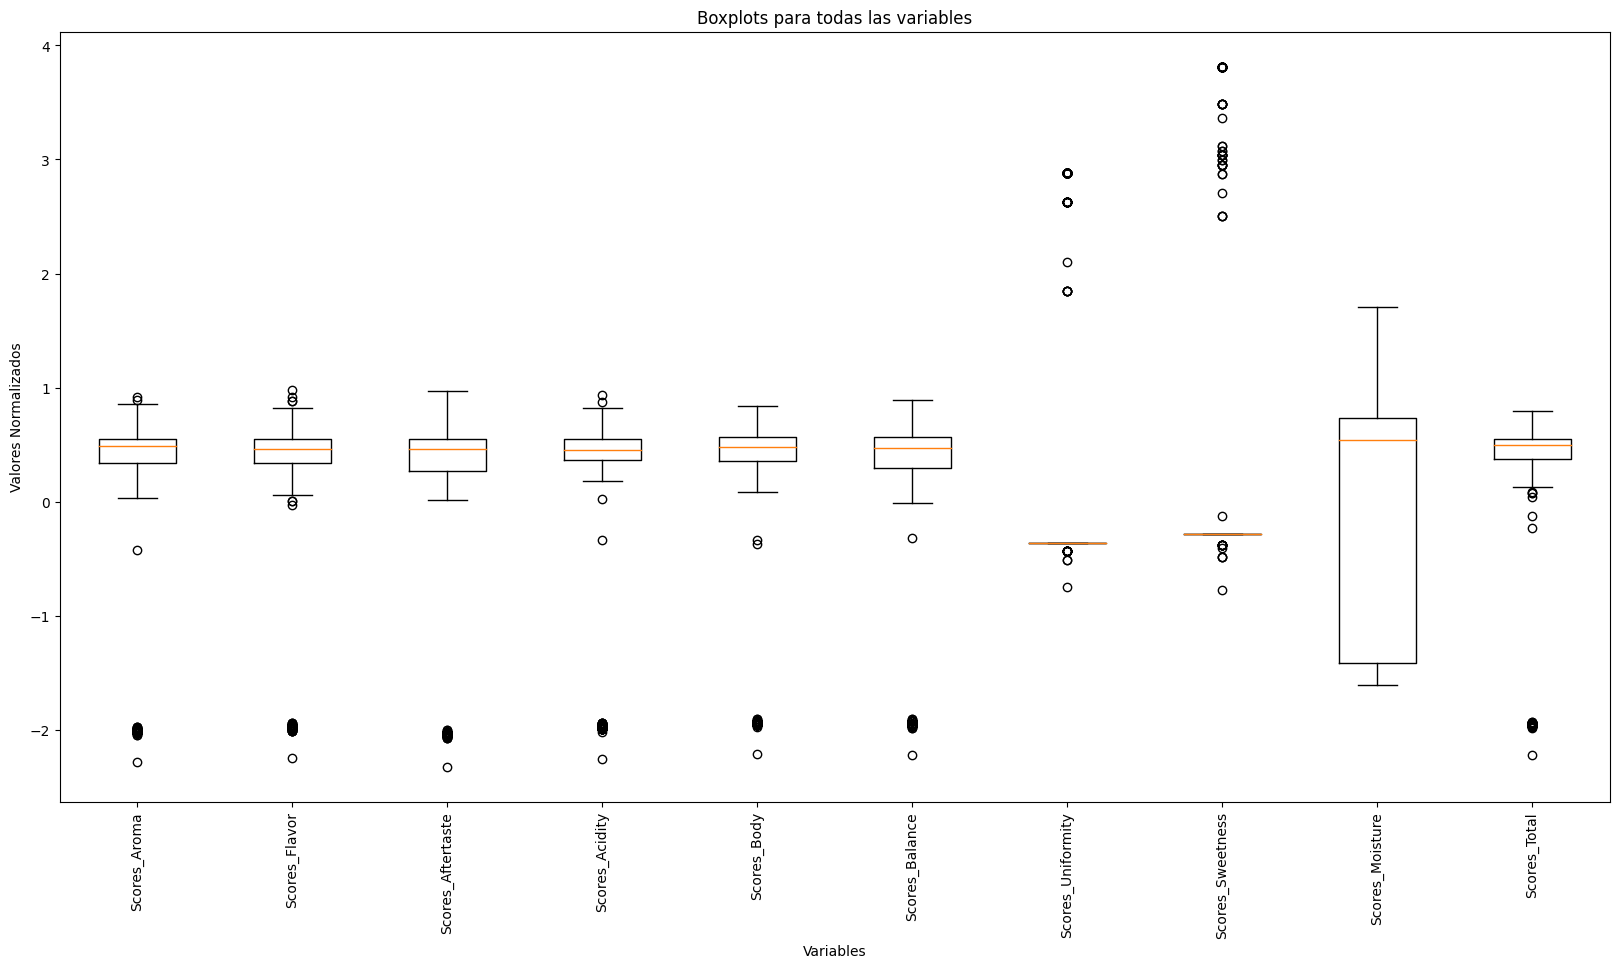

In [9]:
global_boxplots(df)

In [10]:
def global_violinplots(df):
    # Asegúrate de que todas las columnas sean numéricas
    columnas_numericas = df.drop('Color', axis=1).select_dtypes(include=['number'])

    if columnas_numericas.empty:
        print("No hay columnas numéricas en el DataFrame.")
        return

    # Normalizar las columnas numéricas
    scaler = StandardScaler()
    columnas_numericas_normalized = pd.DataFrame(scaler.fit_transform(columnas_numericas), columns=columnas_numericas.columns)

    # Crear una lista de títulos de columnas rotados
    column_titles = [col for col in columnas_numericas_normalized.columns]

    # Configurar el estilo de Seaborn para mejorar la estética
    sns.set(style="whitegrid")

    # Graficar los violines de las columnas numéricas normalizadas
    plt.figure(figsize=(20, 10))
    plt.title("Violinplots para todas las variables")
    violinplot = sns.violinplot(data=columnas_numericas_normalized, inner="quartile")
    
    # Rotar los títulos de las columnas
    violinplot.set_xticklabels(column_titles, rotation=90)
    
    plt.xlabel("Variables")
    plt.ylabel("Valores Normalizados")
    plt.show()


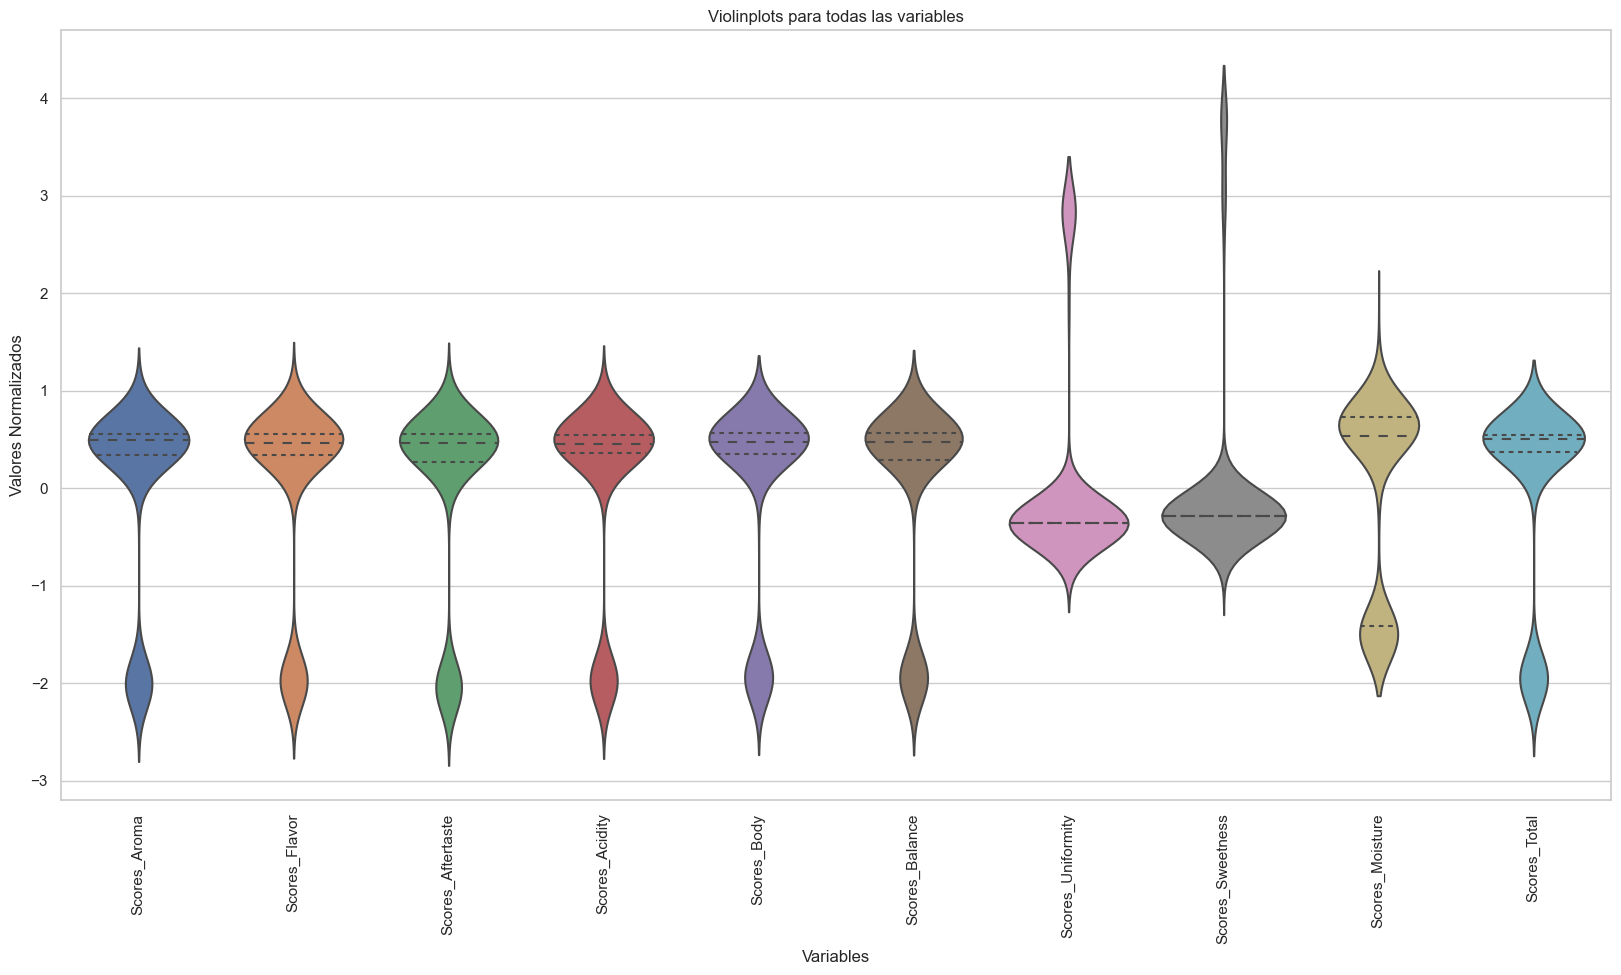

In [11]:
global_violinplots(df)

In [12]:
def violinplots(df, x, y):
    plt.figure(figsize=(15,10))
    sns.violinplot(x=x, y=y, data=df, palette=colors, inner="quartile")
    # plt.xticks(rotation=90)
    plt.show()

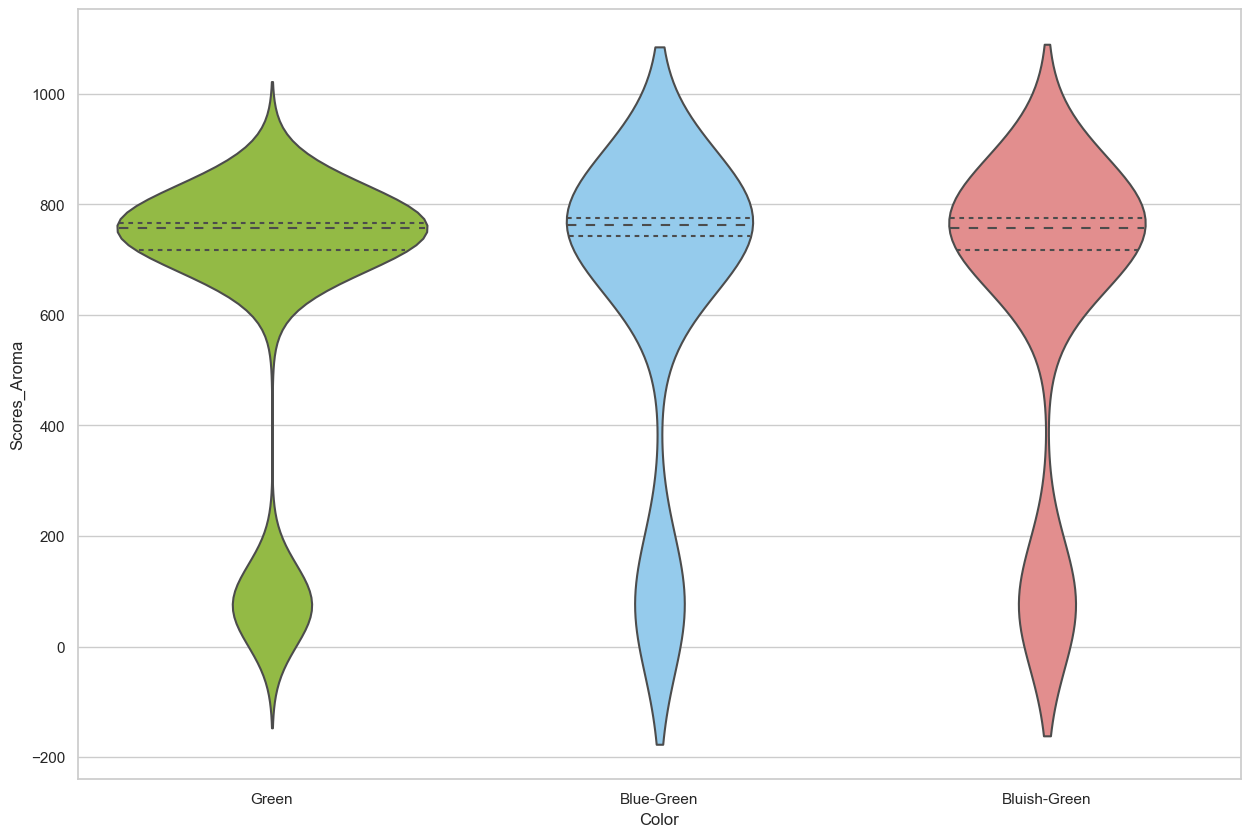

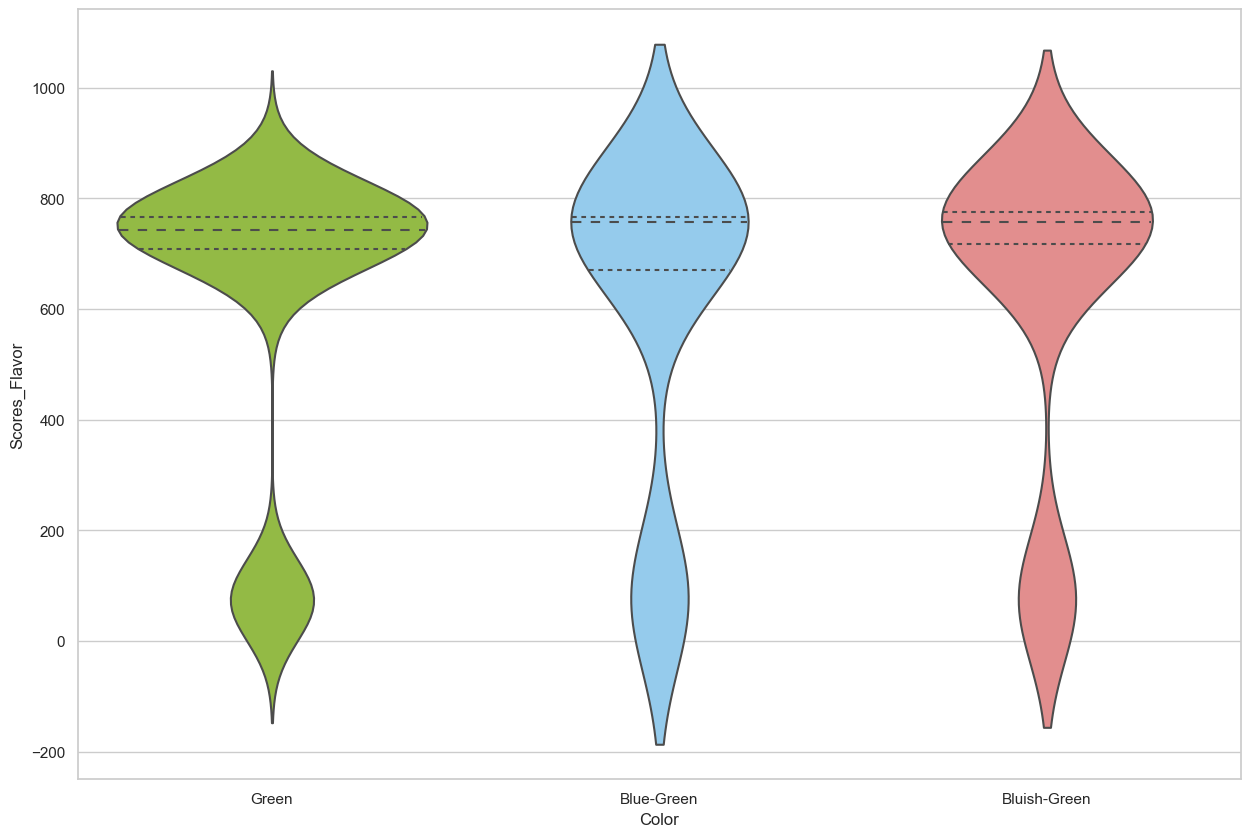

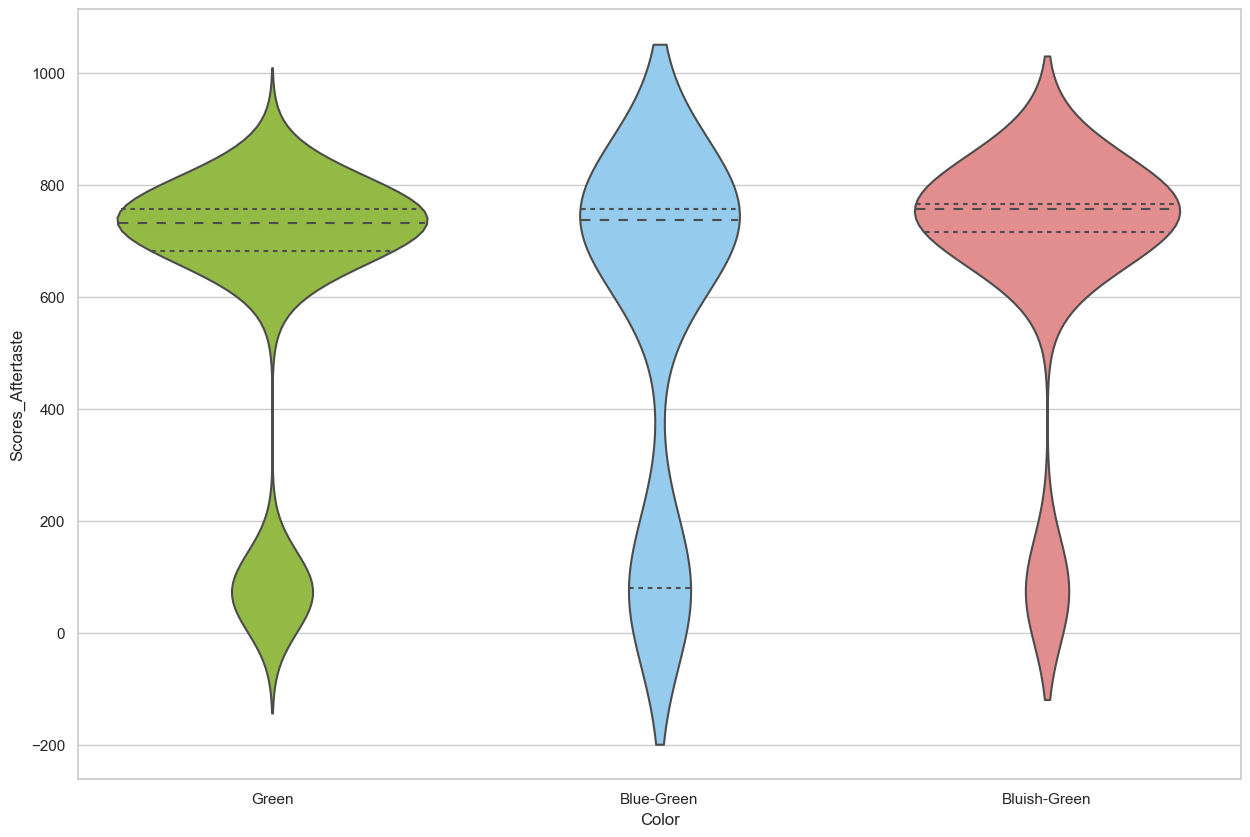

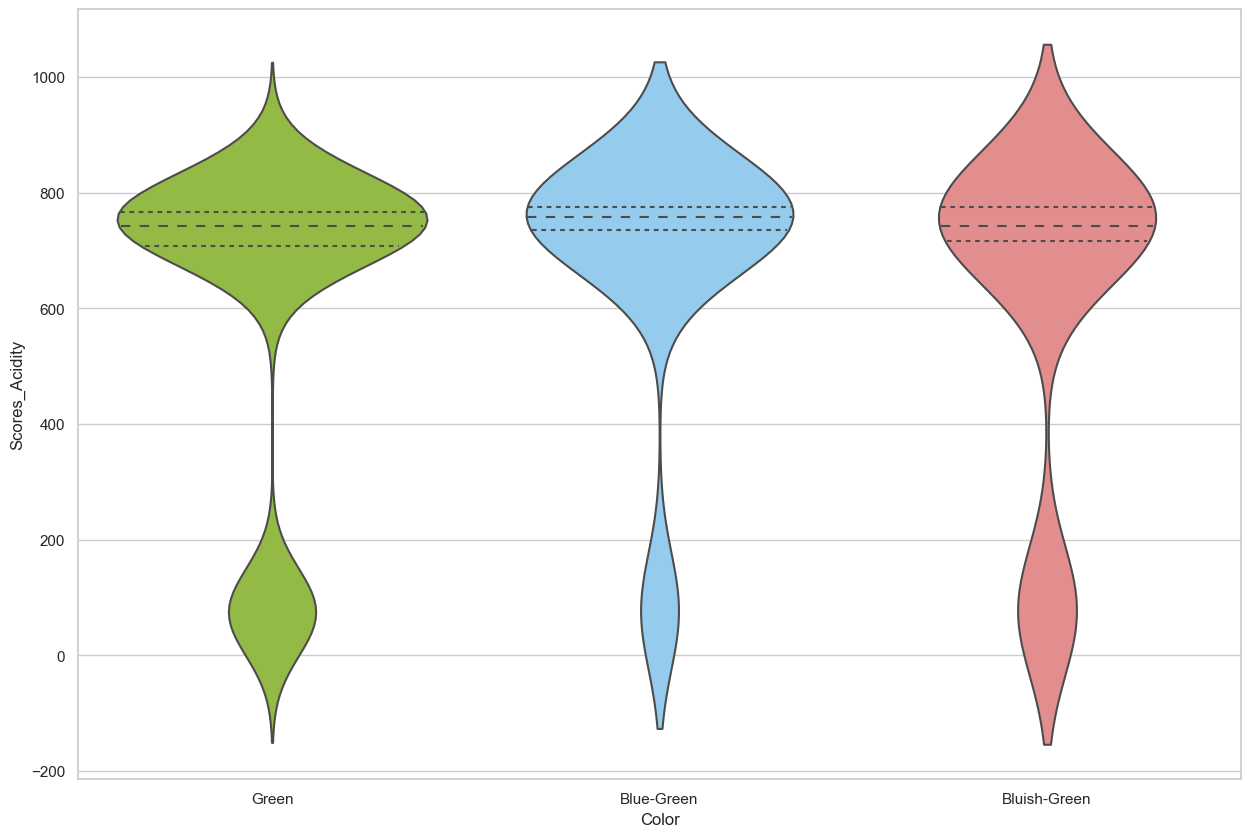

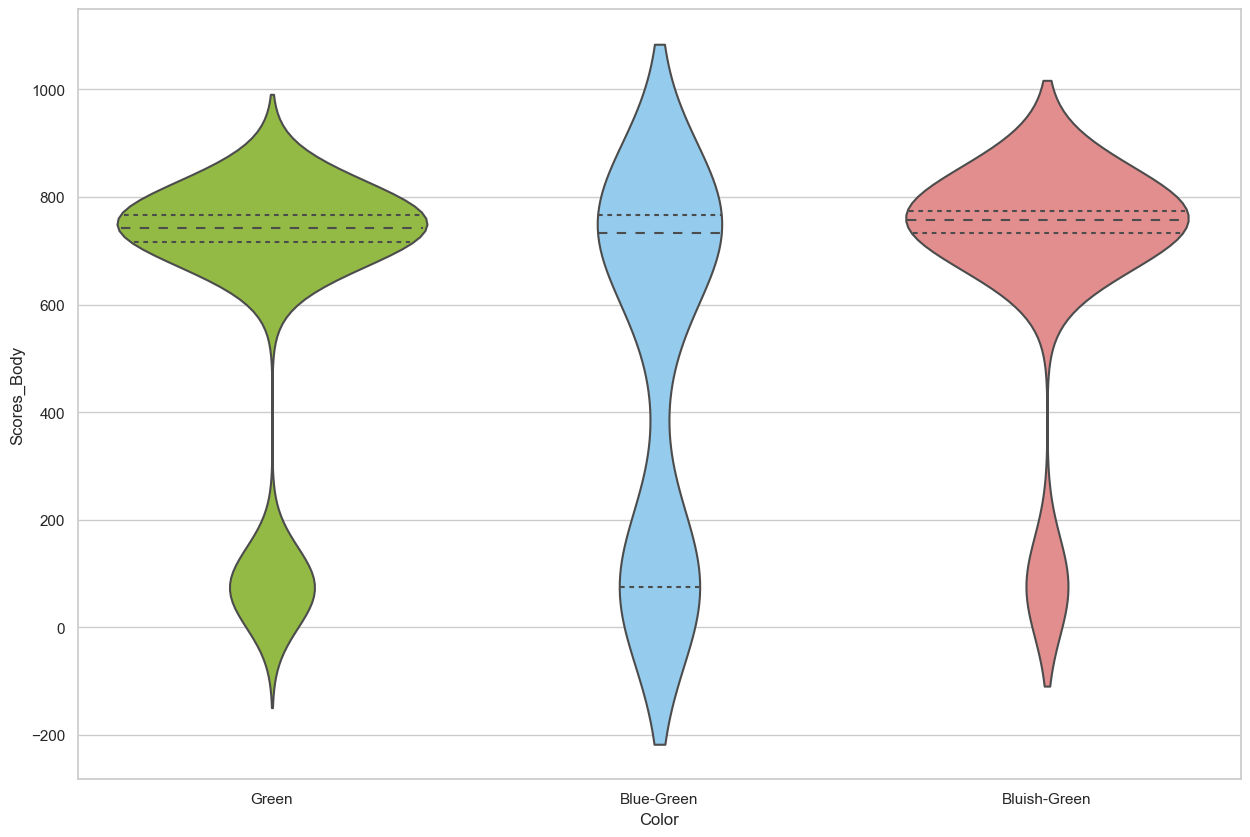

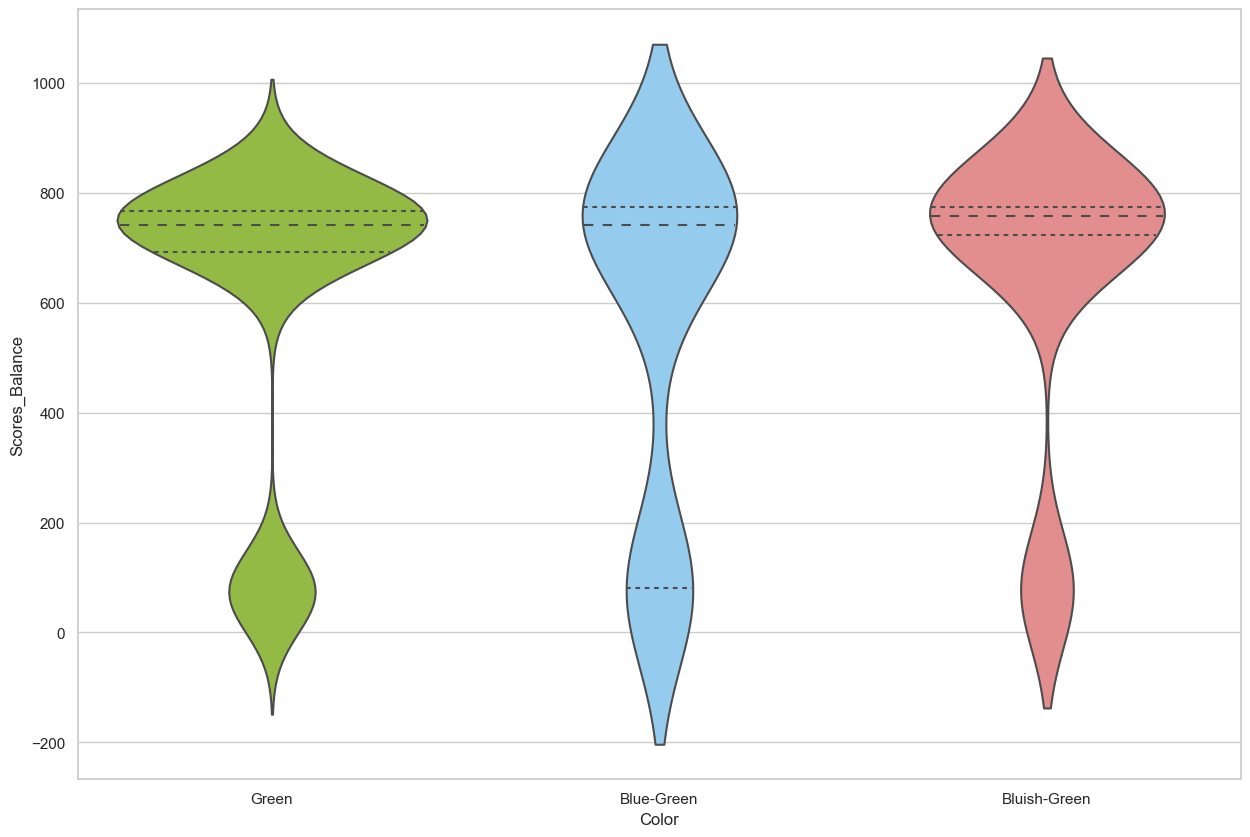

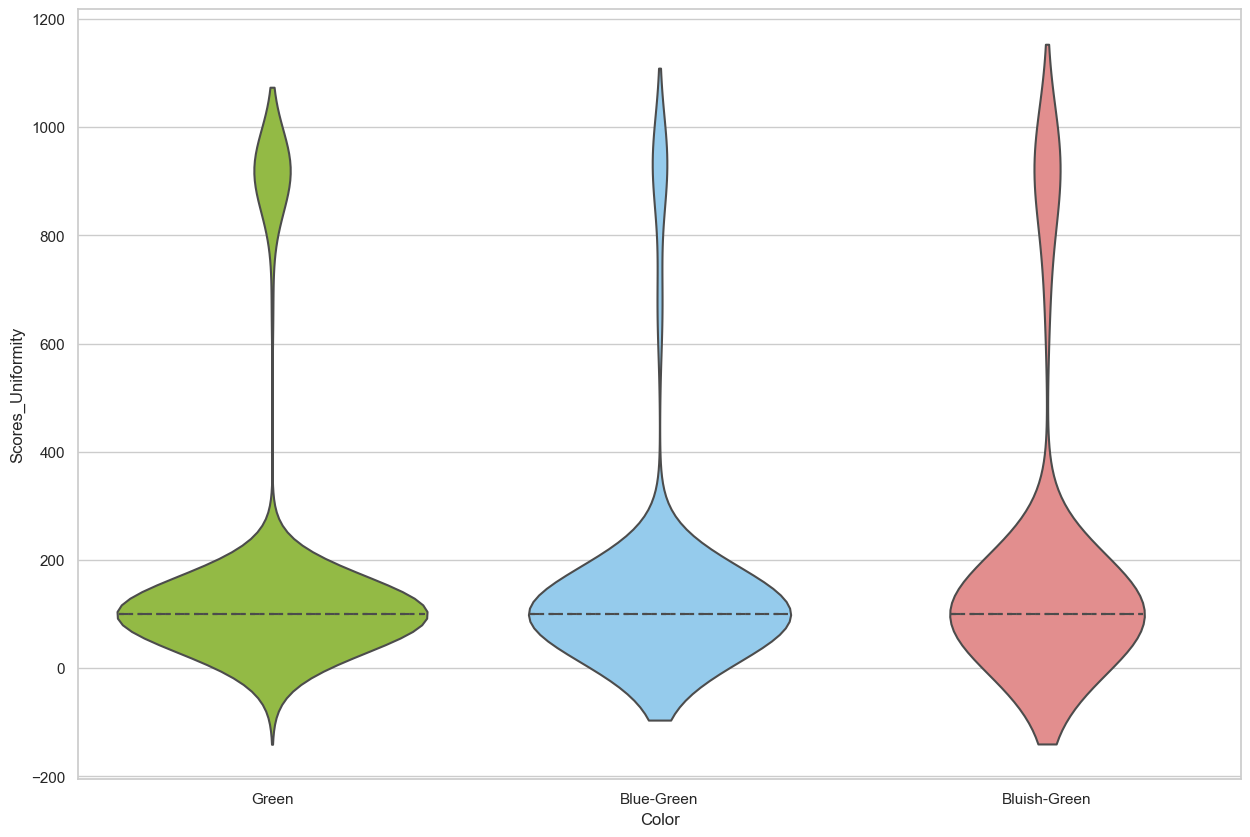

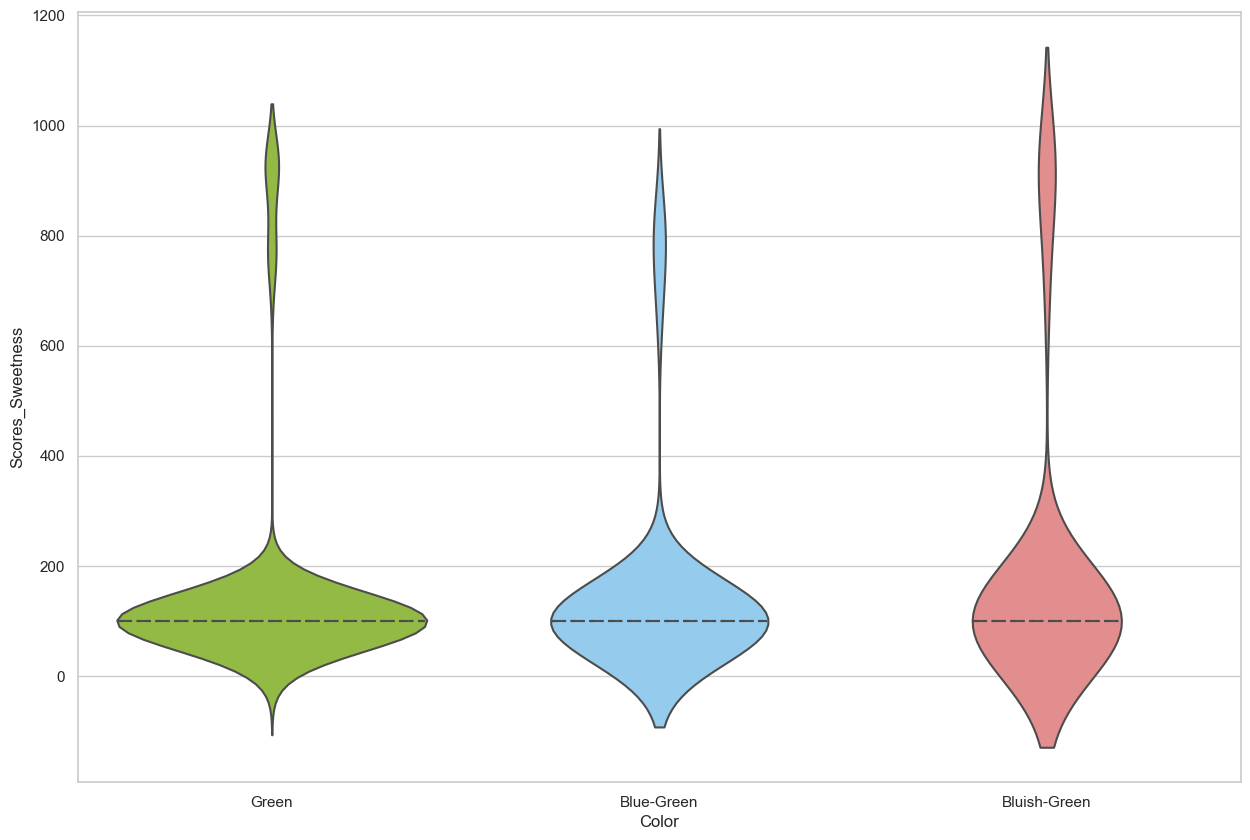

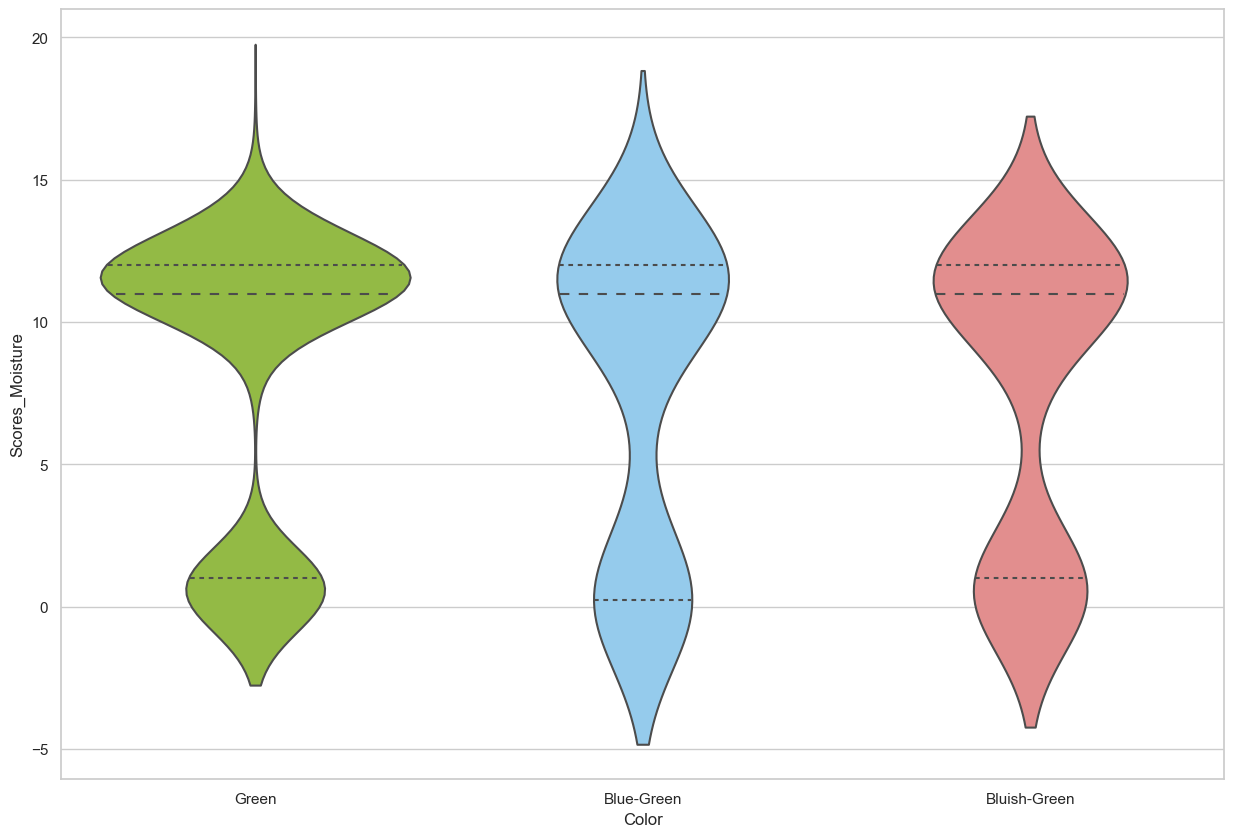

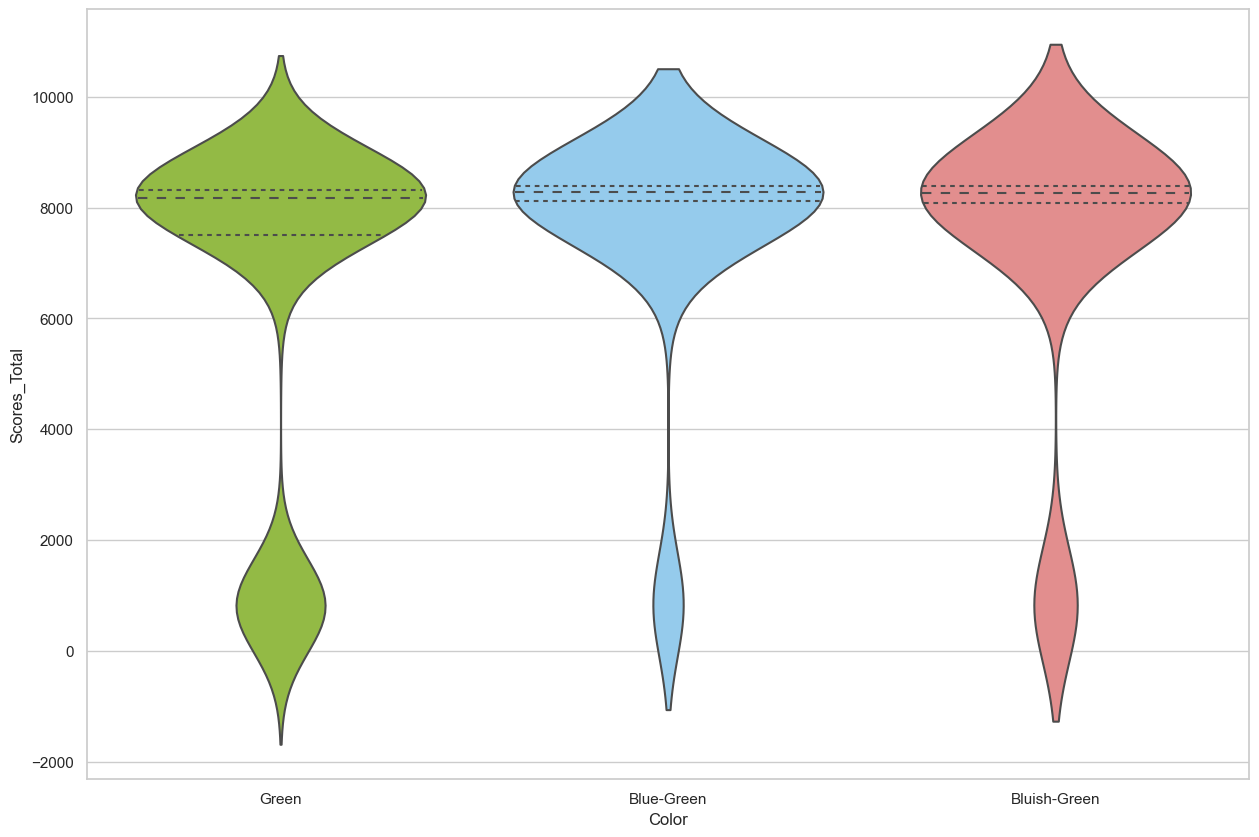

In [13]:
for column in df.drop("Color", axis=1).columns:
    violinplots(df, "Color", column)

In [14]:
def plot_variables(df):
    sns.set(style="darkgrid")

    # Obtiene una lista de todas las columnas numéricas del DataFrame
    numeric_columns = df.drop('Color',axis=1).select_dtypes(include=['number']).columns

    # Calcula el número de filas y columnas necesarias para el ploteo
    num_rows = (len(numeric_columns) + 1) // 2
    num_cols = 2

    fig, axs = plt.subplots(num_rows, num_cols, figsize=(3 * num_rows, 20 * num_cols))

    # Espacio entre los subplots
    plt.subplots_adjust(wspace=1, hspace=1)

    # Colores distintos para los histogramas
    colors = sns.color_palette("Set2", n_colors=len(numeric_columns))

    # Itera a través de las columnas numéricas y crea un histograma para cada una
    for i, col in enumerate(numeric_columns):
        row = i // num_cols
        col_idx = i % num_cols

        # Selecciona un color diferente para cada histograma
        color = colors[i]

        sns.histplot(data=df, x=col, kde=True, color=color, ax=axs[row, col_idx])

        axs[row, col_idx].set_xlabel(col, fontsize=30)
        axs[row, col_idx].set_ylabel("Count",fontsize=20)

        # Cambia el tamaño de letra de los ejes X y Y
        axs[row, col_idx].tick_params(axis='x', labelsize=20)
        axs[row, col_idx].tick_params(axis='y', labelsize=20)

    # Elimina cualquier subplot no utilizado
    for i in range(len(numeric_columns), num_rows * num_cols):
        row = i // num_cols
        col_idx = i % num_cols
        fig.delaxes(axs[row, col_idx])

    # Añade un título general a la figura
    fig.suptitle(f"Histogramas de variales numéricas", fontsize=30)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta el espacio para el título general
    plt.show()

def matriz_correlacion(df):
    corr = df.select_dtypes(include=[float, int]).corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(20, 15))

    ax = sns.heatmap(
        corr,
        #mask = mask,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot=True,
        annot_kws={'size': 15},
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )

    # Añade un título general a la figura
    ax.set_title("Matriz de Correlación", fontsize=30)
        
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajusta el espacio para el título general
    plt.show()


def scatter_plot(df):
    numeric_cols = df.drop('Color',axis=1).select_dtypes(include=['number'])
    num_plots = len(numeric_cols.columns)
    
    # Determina el número de filas y columnas para la matriz
    num_rows = (num_plots + 2) // 3  # Redondea hacia arriba
    num_cols = min(num_plots, 3)

    # Aumenta el tamaño de la figura
    figsize = (20, num_rows * 6)  # Aumenta la altura de la figura
    
    # Crea una figura de Matplotlib con subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, col in enumerate(numeric_cols.columns):
        row = i // num_cols
        col_num = i % num_cols  # Cambia el nombre de la variable para evitar la confusión

        # Selecciona el subplot actual
        ax = axes[row, col_num]

        # Crea el gráfico de dispersión en el subplot
        sns.scatterplot(x=col, y='Color', data=df, ax=ax)
        ax.set_title(col)  # Configura el título del subplot

    # Elimina subplots no utilizados
    for i in range(num_plots, num_rows * num_cols):
        row = i // num_cols
        col_num = i % num_cols
        fig.delaxes(axes[row, col_num])

    plt.tight_layout()
    plt.show()
    
def graficos(df):
    # Imprimir la cantidad de datos disponibles
    print(f"Cantidad de datos disponibles en el DataFrame: {len(df)}")
    plot_variables(df)
    matriz_correlacion(df)
    scatter_plot(df)

Cantidad de datos disponibles en el DataFrame: 835


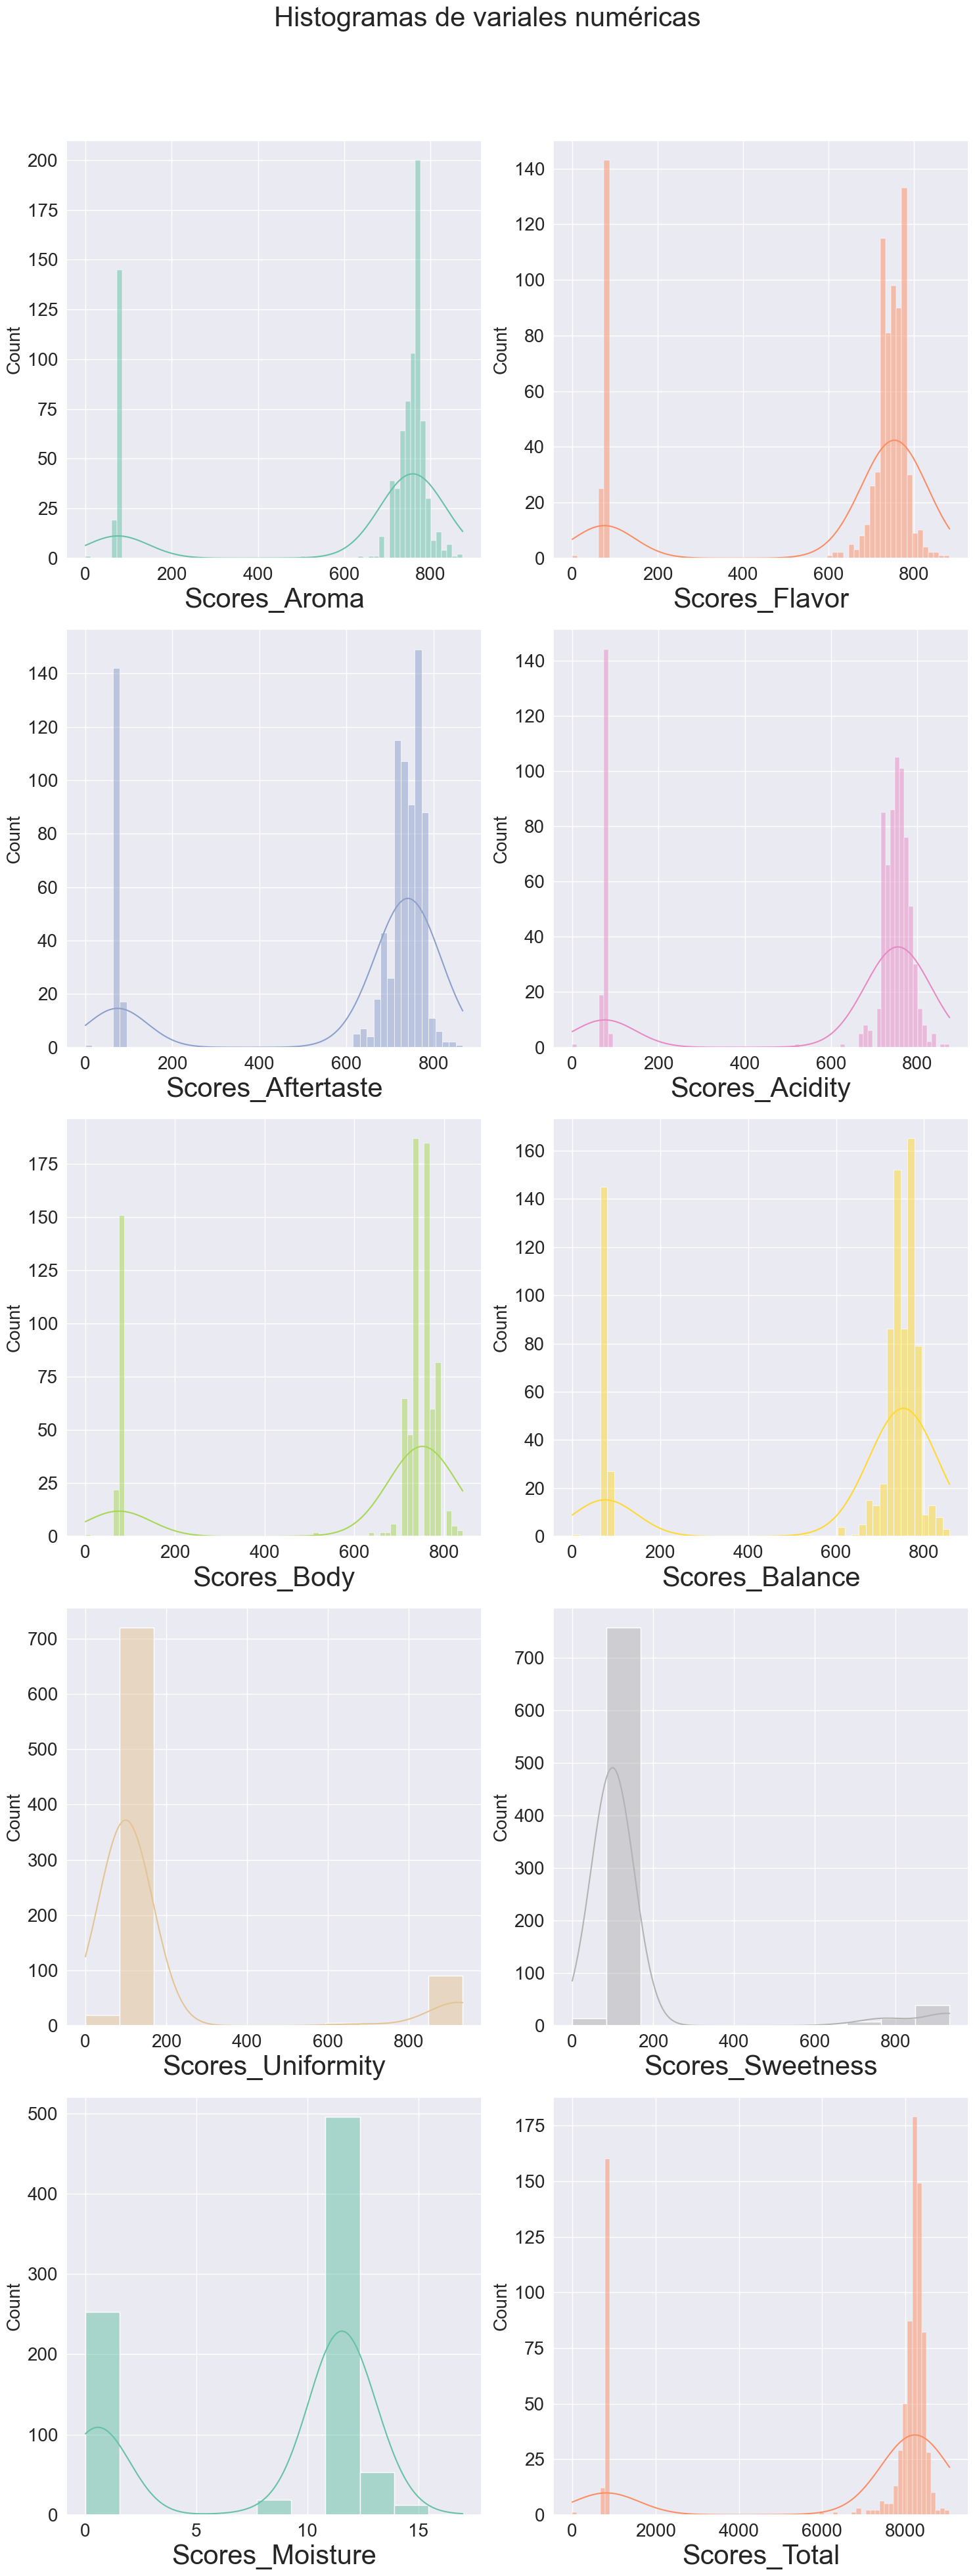

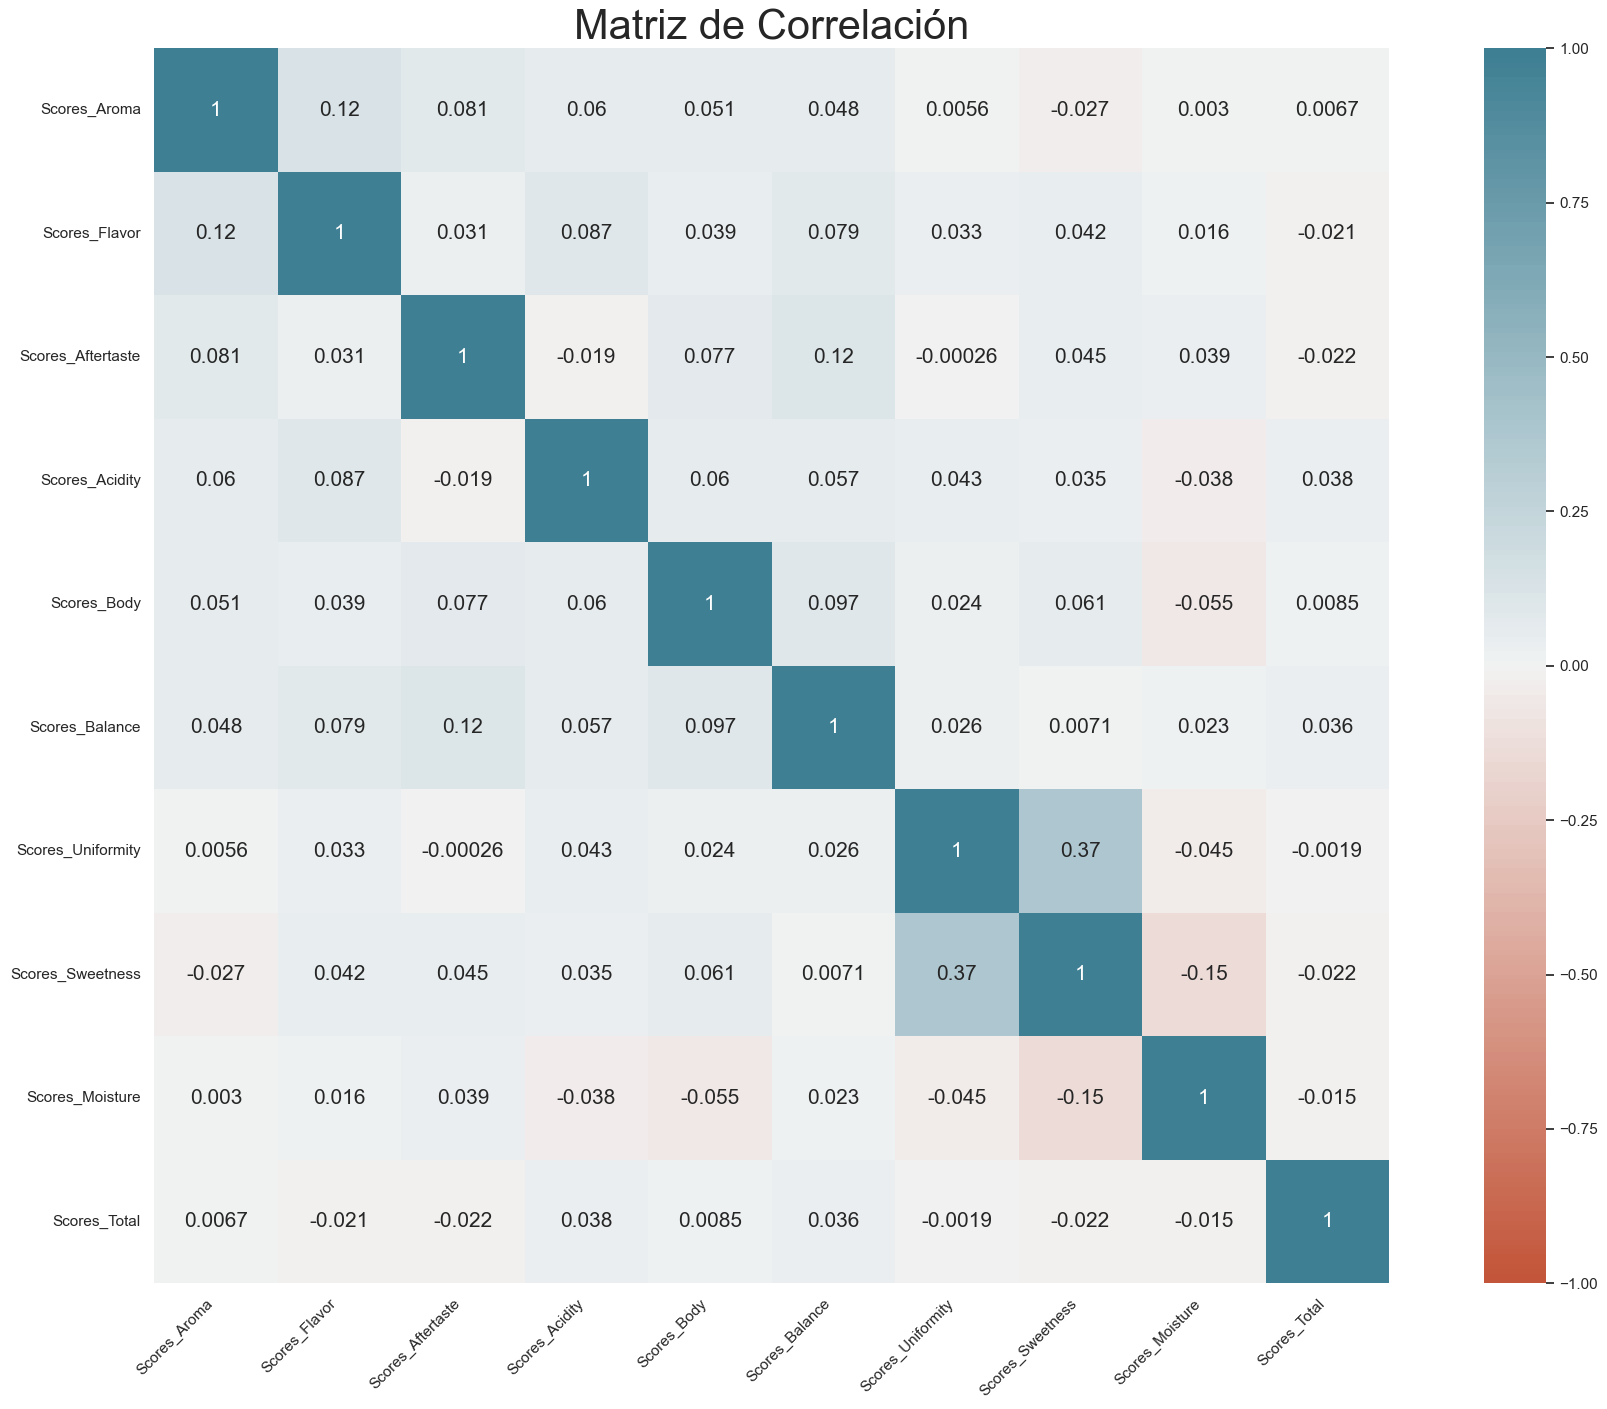

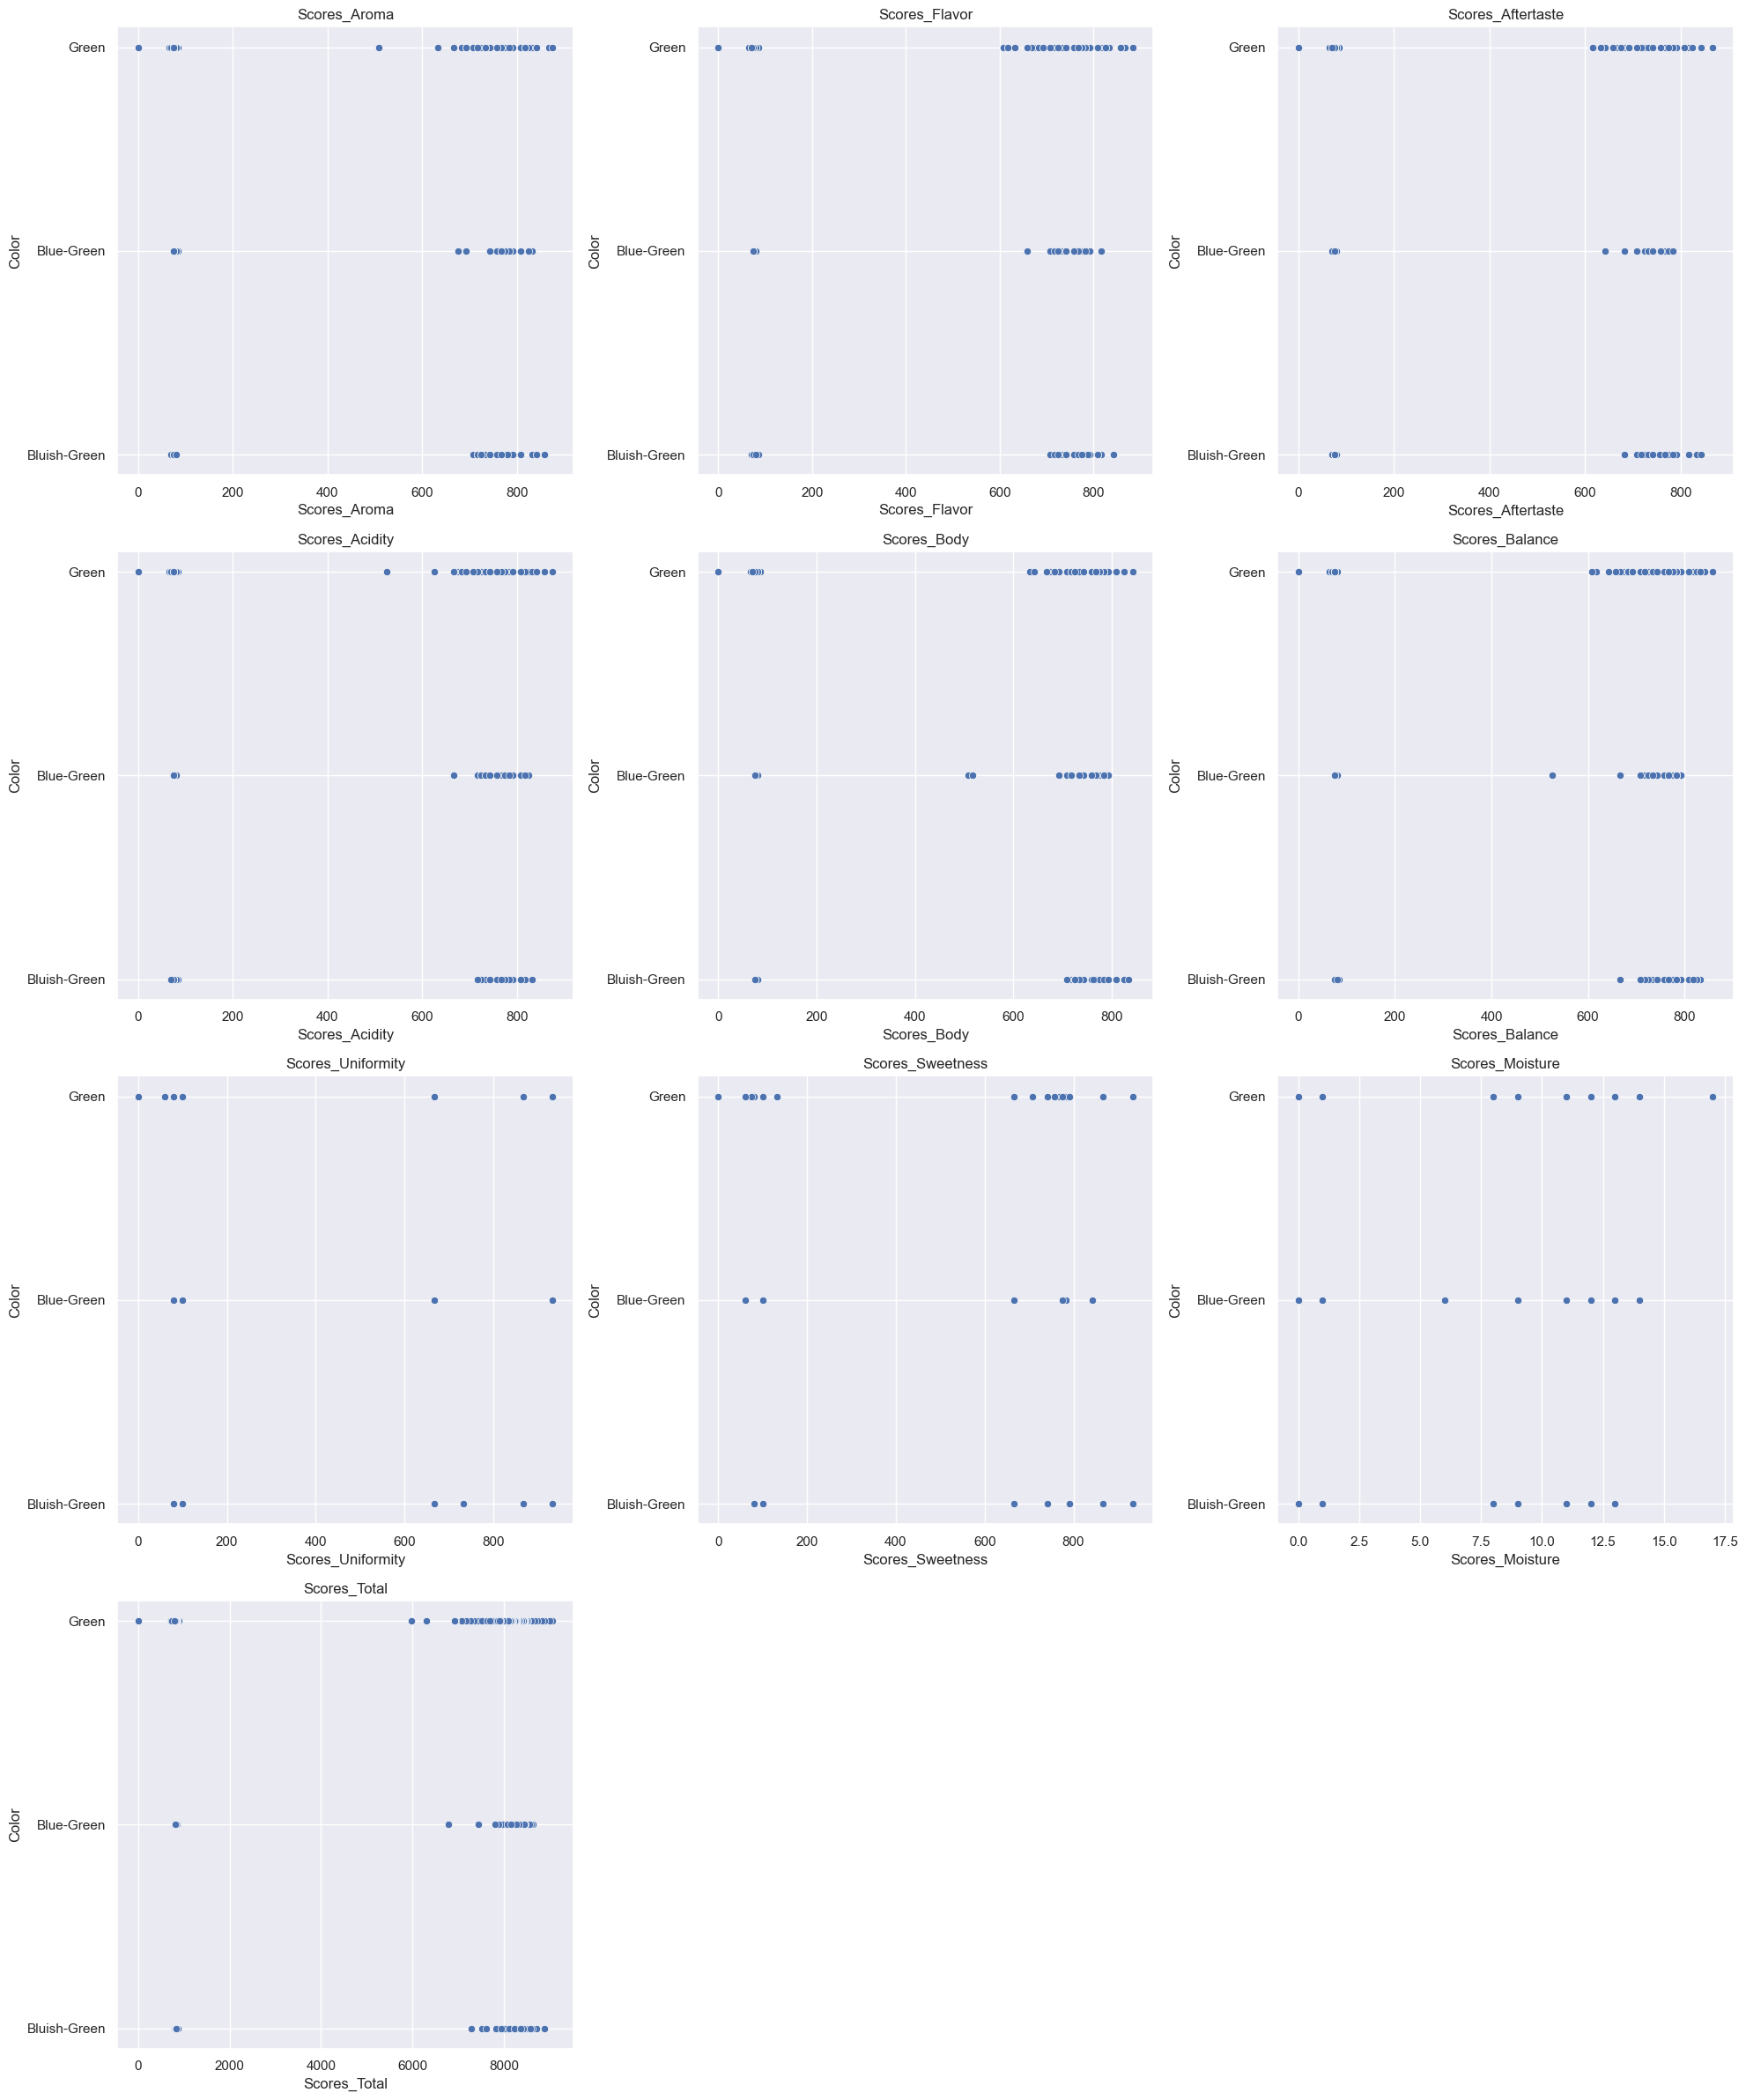

In [15]:
graficos(df)

## Split

In [16]:
# Separar X e y
X_Bi = df.drop('Color', axis=1)
y_Bi = df['Color']

# Convertir etiquetas a valores numéricos
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(y_Bi.ravel())


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_Bi)

X_train, X_test, Y_train, Y_test = train_test_split(X_Bi,
                                                                y_Bi.values.reshape(-1,1),
                                                                train_size = 0.8,
                                                                random_state = 42,
                                                                shuffle = True)



## SVM - KERNEL LINEAL

In [17]:
# Definición del Modelo
svm_classifier_linear = SVC(kernel='linear', C=1.0)

# Entrenamiento
svm_classifier_linear.fit(X_train, Y_train)

# Predicciones
y_pred_linear = svm_classifier_linear.predict(X_test)

# Evaluación
accuracy = accuracy_score(Y_test, y_pred_linear)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 79.04%


## SVM - KERNEL GAUSSIANO

In [18]:
# Parámetros del Gridsearch
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                'C': [1, 10, 100, 1000]},
                 {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [19]:
# Aplicar GS para elegir los mejores hiperparámetros
svm_model = RandomizedSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_train, Y_train)

KeyboardInterrupt: 

In [ ]:
# Mejor modelo
C= svm_model.best_estimator_.C
kernel= svm_model.best_estimator_.kernel
gamma= svm_model.best_estimator_.gamma

print('C:',svm_model.best_estimator_.C,"\n")
print('Kernel:',svm_model.best_estimator_.kernel,"\n")
print('Gamma:',svm_model.best_estimator_.gamma,"\n")
print('Métricas:', svm_model.best_score_,"\n")

In [ ]:
# Crear un clasificador SVM con kernel gaussiano
svm_classifier_rbf = SVC(kernel=kernel, C=C, gamma=gamma)  # Puedes ajustar los parámetros C y gamma según sea necesario

# Entrenar el clasificador SVM
svm_classifier_rbf.fit(X_train, Y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_rbf = svm_classifier_rbf.predict(X_test)

# Evaluar el modelo
accuracy_rbf = accuracy_score(Y_test, y_pred_rbf)
print(f"Accuracy (Kernel Gaussiano): {accuracy_rbf * 100:.2f}%")

Accuracy (Kernel Gaussiano): 80.84%


C:\Users\augus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## RANDOM FOREST